# 파이썬을 통한 국제 유가와 국내 석유화학사들의 주가 상관관계 및 상관요인 분석
### 추가사항)Prophet 라이브러리를 통한 국제 유가 시계열 예측
#### <p style="text-align:right">경제학특강3(ECO4020-01) 학기말 발표자료<br>1조 - 20130597 배민국 20150553 남경훈</p>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

growth = pd.read_csv("growth_rate.csv",encoding="cp949")


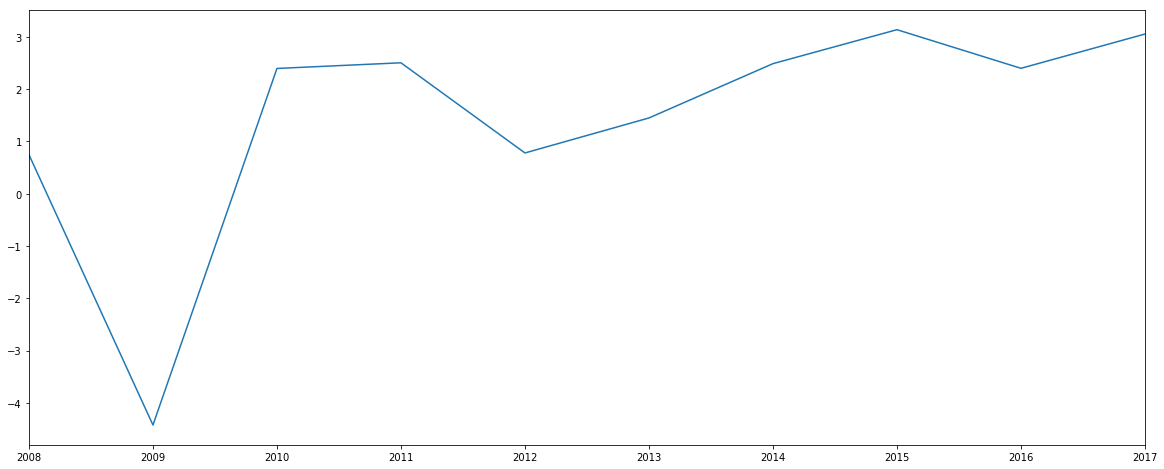

In [2]:
growth.mean().plot(figsize=[20,8])

### 10개년 세계 경제성장률 그래프

In [3]:
import platform
from matplotlib import font_manager, rc

path ="c:\Windows\Fonts\malgun.ttf"

font_name = font_manager.FontProperties(fname=path).get_name()
rc("font", family=font_name)

## matplotlib 에서 한글을 사용하기 위해 malgun 폰트를 임포트

In [4]:
import urllib.request

csv_url = "https://datahub.io/core/oil-prices/r/wti-monthly.csv"

urllib.request.urlretrieve(csv_url,"WTI-monthly.csv")

('WTI-monthly.csv', <http.client.HTTPMessage at 0x2c37fc6dc50>)

## urllib.request 라이브러리를 통해서 datahub.io 에서 WTI 가격을 csv 파일로 저장

In [5]:
import pandas as pd

oil = pd.read_csv("WTI-monthly.csv")
oil = oil[-136:] # 2008년 1월 부터의 wti price
oil["Date"] = oil["Date"].astype("datetime64")
oil = oil.set_index("Date")
oil.head()

,Price
Date,
2008-01-15,92.97
2008-02-15,95.39
2008-03-15,105.45
2008-04-15,112.58
2008-05-15,125.40


## DataFrame 으로 저장

In [6]:
oil["New"] = oil["Price"] / max(oil["Price"]) # Scale 통일을 위해 max 값으로서 나누어주었음.

In [7]:
oil.head()

,Price,New
Date,,
2008-01-15,92.97,0.694428
2008-02-15,95.39,0.712504
2008-03-15,105.45,0.787646
2008-04-15,112.58,0.840902
2008-05-15,125.40,0.936660


In [8]:
oil_rolling_mean_3 = oil["Price"].rolling(window=3).mean()
oil_rolling_mean_6 = oil["Price"].rolling(window=6).mean()
oil_rolling_mean_12 = oil["Price"].rolling(window=12).mean()

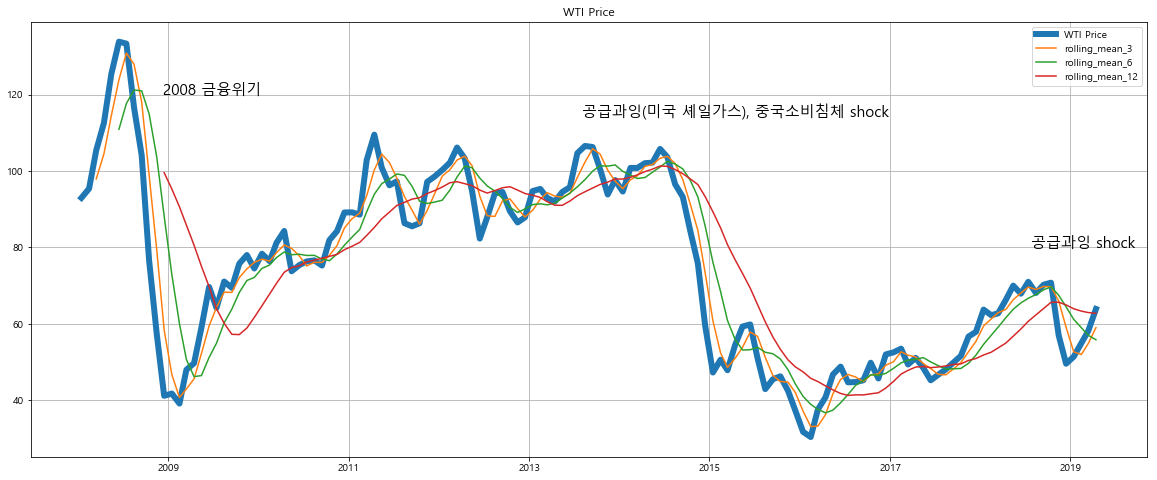

In [9]:
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

plt.figure(figsize=[20,8])
plt.title("WTI Price")
plt.plot(oil["Price"], label="WTI Price", lw="6")
plt.plot(oil_rolling_mean_3, label="rolling_mean_3")
plt.plot(oil_rolling_mean_6, label="rolling_mean_6")
plt.plot(oil_rolling_mean_12, label="rolling_mean_12")
plt.text(datetime(2008,12,10), 120, '2008 금융위기',fontsize=15)
plt.text(datetime(2013,8,1),114,'공급과잉(미국 셰일가스), 중국소비침체 shock',fontsize=15)
plt.text(datetime(2018,7,25),80,"공급과잉 shock",fontsize=15)
plt.grid(True)
plt.legend()
plt.show()

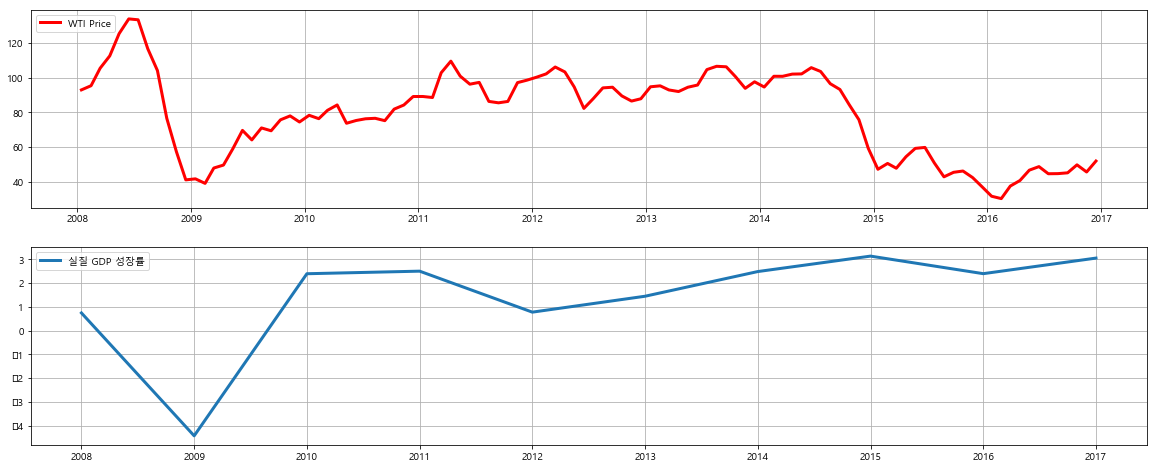

In [10]:
fig = plt.figure(figsize=[20,8])
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)


ax1.plot(oil["Price"][:-28],color="r",label="WTI Price",lw="3")
ax1.grid(True)
ax2.plot(growth.mean(),label = "실질 GDP 성장률",lw="3")
ax2.grid(True)

ax1.legend(loc="upper left")
ax2.legend(loc="upper left")

plt.show()


## WTI의 10개년(2008~2017) 가격변동추이그래프 및 90일, 180일, 360일 이동평균선

In [11]:
import fix_yahoo_finance as yf
import datetime as dt

start = dt.datetime(2008,1,1)
end = dt.datetime.now()

tickers = ["051910.KS","096770.KS","009830.KS"]
data = []

for i in range(len(tickers)):
    data.append(yf.download(tickers[i],start=start,end=end))

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


## 야후파이낸스를 통해 LG화학, SK이노베이션, 한화케미칼의 주식 데이터 다운로드

In [12]:
match_data = {"LG화학":data[0],"SK이노베이션":data[1],"한화케미칼":data[2]}

In [13]:
match_data["LG화학"]["New"] = match_data["LG화학"]["Close"] / max(match_data["LG화학"]["Close"])
match_data["SK이노베이션"]["New"] = match_data["SK이노베이션"]["Close"] / max(match_data["SK이노베이션"]["Close"])
match_data["한화케미칼"]["New"] = match_data["한화케미칼"]["Close"] / max(match_data["한화케미칼"]["Close"])

In [14]:
LG_rolling_mean = match_data["LG화학"]["Close"].rolling(window=120).mean()

Text(0.5,1,'LG화학')

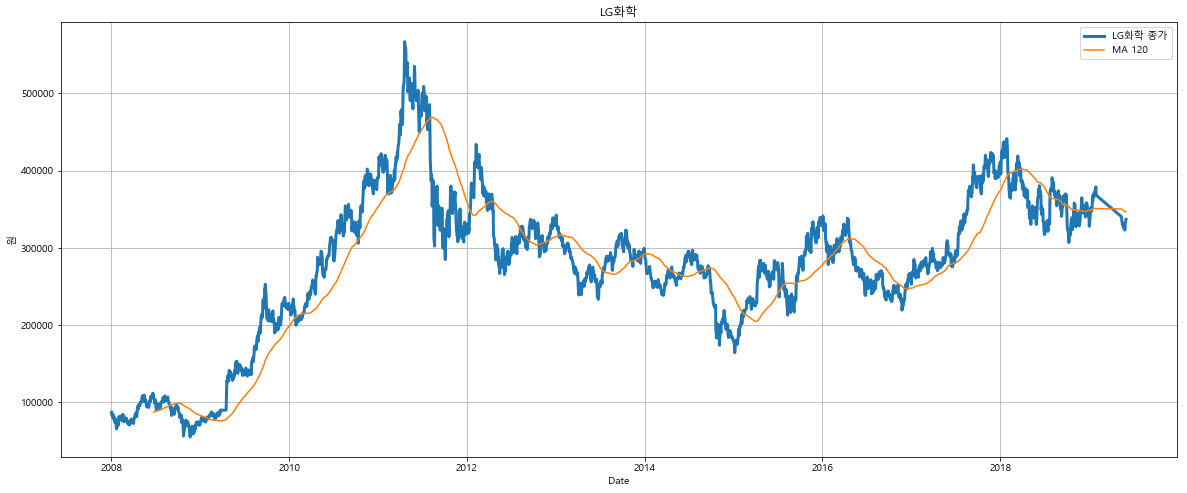

In [15]:
plt.figure(figsize=[20,8])
plt.plot(match_data["LG화학"]["Close"],label="LG화학 종가",lw="3")
plt.plot(LG_rolling_mean, label = "MA 120")
plt.grid(True)
plt.legend()
plt.ylabel("원")
plt.xlabel("Date")
plt.title("LG화학")

In [16]:
SK_rolling_mean = match_data["SK이노베이션"]["Close"].rolling(window=120).mean()

Text(0.5,1,'SK이노베이션')

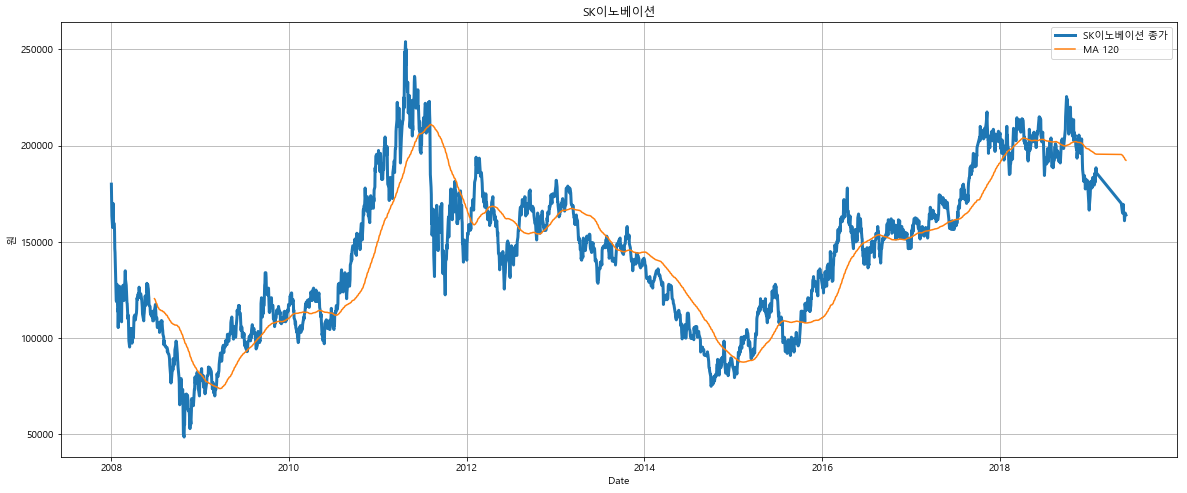

In [17]:
plt.figure(figsize=[20,8])
plt.plot(match_data["SK이노베이션"]["Close"],label="SK이노베이션 종가",lw="3")
plt.plot(SK_rolling_mean, label = "MA 120")
plt.grid(True)
plt.legend()
plt.xlabel("Date")
plt.ylabel("원")
plt.title("SK이노베이션")

In [18]:
Hanhwa_rolling_mean = match_data["한화케미칼"]["Close"].rolling(window=120).mean()

Text(0.5,1,'한화케미칼')

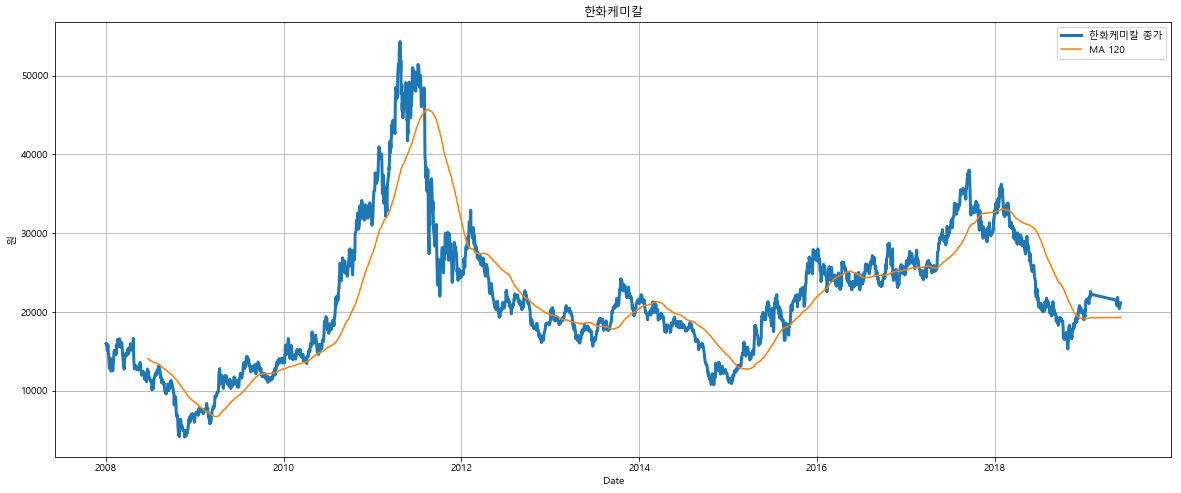

In [19]:
plt.figure(figsize=[20,8])
plt.plot(match_data["한화케미칼"]["Close"],label="한화케미칼 종가",lw="3")
plt.plot(Hanhwa_rolling_mean, label = "MA 120")
plt.grid(True)
plt.legend()
plt.xlabel("Date")
plt.ylabel("원")
plt.title("한화케미칼")

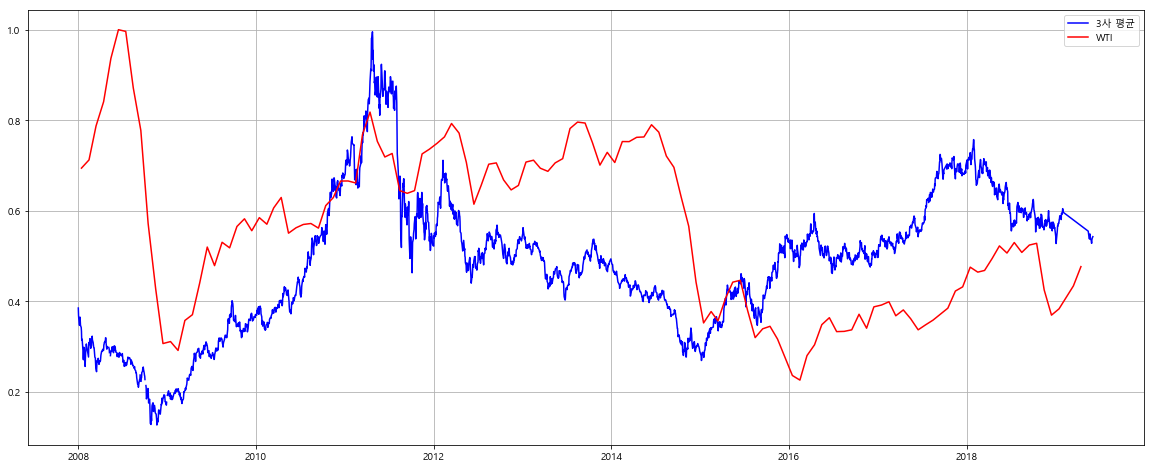

In [20]:
plt.figure(figsize=[20,8])
plt.plot((match_data["LG화학"]["New"]+match_data["SK이노베이션"]["New"]+match_data["한화케미칼"]["New"])/3, color = "b", label = "3사 평균")
plt.plot(oil["New"],color = "r", label = "WTI")
plt.grid(True)

plt.legend()
plt.show();

## Max 값으로 나눈 Series와 WTI 가격을 함께 그래프에 나타냄

## 국제유가와 정유회사들의 주가 상관관계(correlation) 분석

In [21]:
cor_data = match_data["SK이노베이션"]["Close"]
cor_data = cor_data.to_frame()

cor_data["SK이노베이션"] = match_data["SK이노베이션"]["Close"].to_frame()
cor_data["LG화학"] = match_data["LG화학"]["Close"].to_frame()
cor_data["한화케미칼"] = match_data["한화케미칼"]["Close"].to_frame()
cor_data["WTI"] = oil["Price"].to_frame()
del cor_data["Close"]

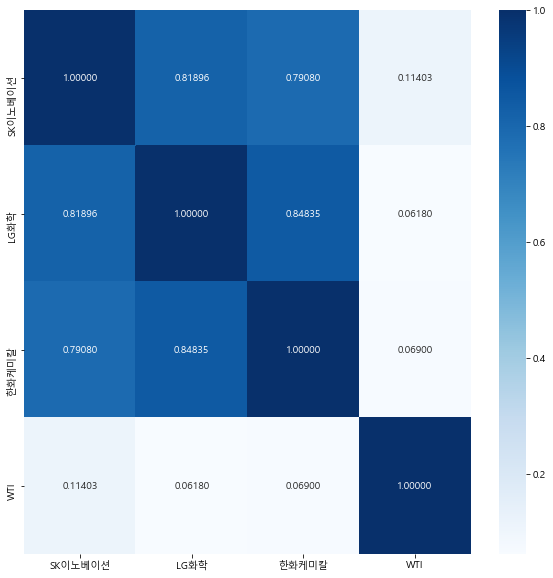

In [22]:
import seaborn as sns

plt.figure(figsize=[10,10])
sns.heatmap(data = cor_data.corr(),annot = True,cmap="Blues",fmt=".5f")

## 페이스북 Prophet 라이브러리를 통한 forecasting 시행
 > <span style="color:red">이 부분은 prophet 설치가 필요함</span><br> 
 ``` python
 conda install -c conda-forge fbprophet
 ```
 > 참고 논문 : <a href="https://peerj.com/preprints/3190.pdf" target="_blank">Forecasting at scale - PeerJ (2017)</a><br>
 > 참고 페이지 : https://gorakgarak.tistory.com/1255

![1st](991B253B5B1714BF25.png)

- g(t)는 반복적인 요소를 가지지 않은 <span style="color:red">트렌드</span>.
- s(t)는 <span style="color:red">요일 혹은 연 계절성</span>과 같은 반복적인 변화.
- h(t)는  <span style="color:red">Holiday</span>와 같이 가끔씩 불규칙하게 영향을 미치는 요소입니다.
- e는 정규분포를 따르는 잔차라고 가정합니다.

## g(t) : Trend

![2nd](999CE5365B17294F15.png)

- C - Carrying Capacity, K - growth rate, M- Offset parameter
- C(t) 함수에 대한 것은 페이스북에서도 docs에서 따로 언급하지 않았음.
> "당신이 가진 분야 도메인 지식으로 이끌어 내면 되지 않겠어?" 페이스북 曰


## s(t) : Seasonality

- 시계열은 다른 데이터와는 차별화되는 점이 있음. 바로 <span style="color:red">주기성</span>을 띈다는 것 .

![3rd](9932F3395B175B8E0E.png)
![4th](992BF1335B175E6915.png)
![5th](99CAAE335B175E6A0D.png)

- 주기성을 띈다는 그래프


## h(t) : Holiday 


``` python
prophet_object.add_country_holidays(country_name='US')

#코드에서 입력하면 미국의 휴일을 자동으로 계산하여
#특정 휴일날짜에 대한 데이터를 살펴볼 수 있습니다.
#ex)부활절, 크리스마스 등 

```


## 예제를 살펴보겠습니다 !

In [23]:
import urllib.request

csv_url = "https://datahub.io/core/oil-prices/r/wti-daily.csv"

urllib.request.urlretrieve(csv_url,"WTI-daily.csv")

('WTI-daily.csv', <http.client.HTTPMessage at 0x2c3021d53c8>)

### datahub.io 에서 daily wti price를 저장

In [24]:
import warnings
warnings.filterwarnings("ignore")
import itertools

In [25]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet #prophet 사용
from datetime import datetime

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


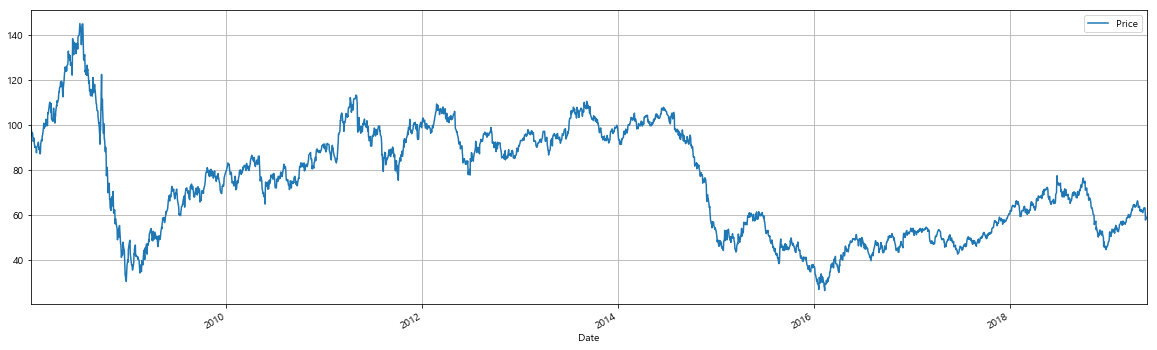

In [26]:
df = pd.read_csv("WTI-daily.csv")
df = df[5551:]
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")

df.plot(figsize=(20,6))
plt.grid(True)

In [27]:
df = pd.read_csv("WTI-daily.csv")
df = df[5551:]
df["Date"] = pd.to_datetime(df["Date"])
df.reset_index(inplace=True)

df = pd.DataFrame({"ds":df["Date"], "y" : df["Price"]})

m = Prophet(daily_seasonality=True)

m.fit(df);

## Prophet 객체를 생성. ds와 y colomn을 통해 분석을 시행함 .

In [28]:
df.tail()

,ds,y
2865,2019-05-22,61.42
2866,2019-05-23,57.65
2867,2019-05-24,58.40
2868,2019-05-27,58.40
2869,2019-05-28,58.91


In [29]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
2895,2019-06-23
2896,2019-06-24
2897,2019-06-25
2898,2019-06-26
2899,2019-06-27


## Prophet을 통해 30일(1개월)간의 예측을 시행.

In [30]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2895,2019-06-23,70.481507,60.419710,79.556950
2896,2019-06-24,71.195504,61.521837,80.365597
2897,2019-06-25,71.264175,61.763051,81.383022
2898,2019-06-26,71.342272,61.468133,80.505057
2899,2019-06-27,71.446117,61.773894,81.590300


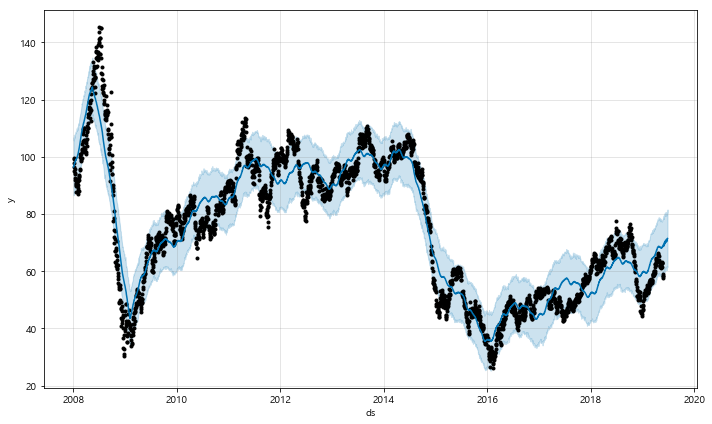

In [31]:
m.plot(forecast);

## WTI Price가 1개월동안 유가상승 추세를 유지할 것이라고 예측. (음영부분은 변동성의 크기)

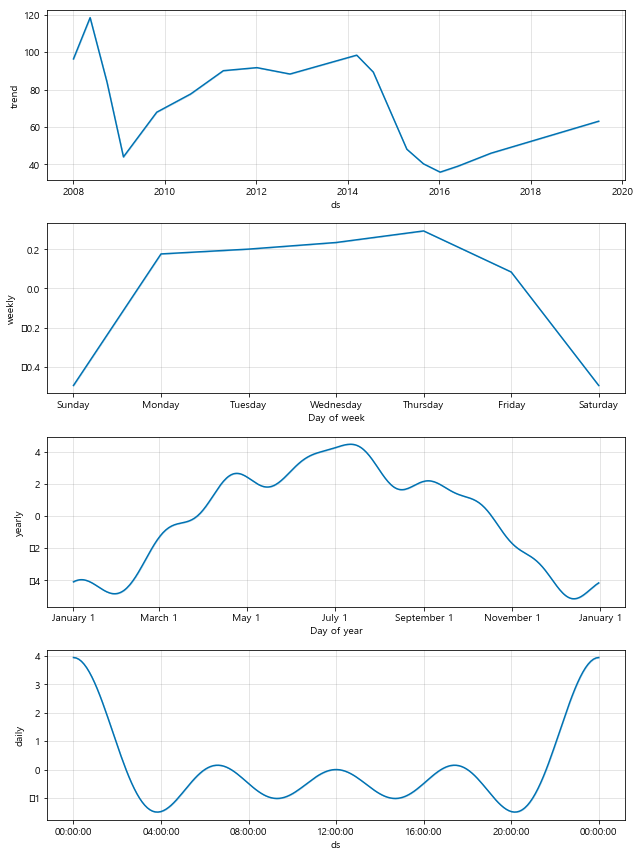

In [32]:
m.plot_components(forecast);

## 3~9월 유가가 상승하는 경향이 있고 9~2월 유가가 하락하는 경향이 있다고 볼 수 있음

## Prophet prediction 예측의 정확성을 보기 위해 과거의 데이터를 통한 분석의 설득력을 확인할 것임

In [33]:
df2 = pd.read_csv("WTI-daily.csv")
df2 = df2[5551:-30]
df2["Date"] = df2["Date"].astype("datetime64")
df2 = df2.set_index("Date")

In [34]:
df2.tail()

,Price
Date,
2019-04-09,64.05
2019-04-10,64.62
2019-04-11,63.61
2019-04-12,63.86
2019-04-15,63.43


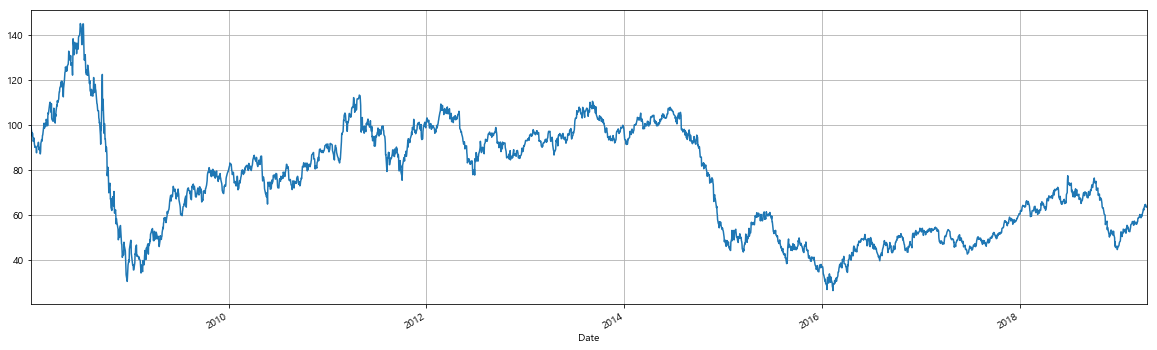

In [35]:
df2["Price"].plot(figsize=(20,6),grid=True)

## 2008년 경 부터 2018년 까지의 WTI 가격

In [36]:
df3 = pd.read_csv("WTI-daily.csv")
df3 = df3[5551:]
df3["Date"] = df3["Date"].astype("datetime64")
df3 = df3.set_index("Date")

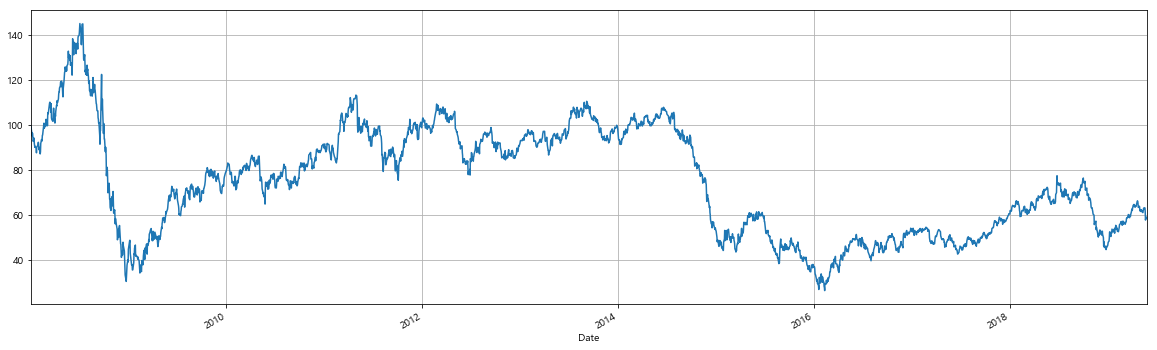

In [37]:
df3["Price"].plot(figsize=(20,6),grid=True)

## 같은 시작시점에서부터, 현재까지의 가격

In [38]:
df2 = pd.read_csv("WTI-daily.csv")
df2 = df2[5551:-30]
df2["Date"] = pd.to_datetime(df2["Date"])
df2.reset_index(inplace=True)

df2 = pd.DataFrame({"ds":df2["Date"], "y" : df2["Price"]})

m2 = Prophet(daily_seasonality=True)

m2.fit(df2);

In [39]:
future2 = m2.make_future_dataframe(periods=49)
future2.tail()

,ds
2884,2019-05-30
2885,2019-05-31
2886,2019-06-01
2887,2019-06-02
2888,2019-06-03


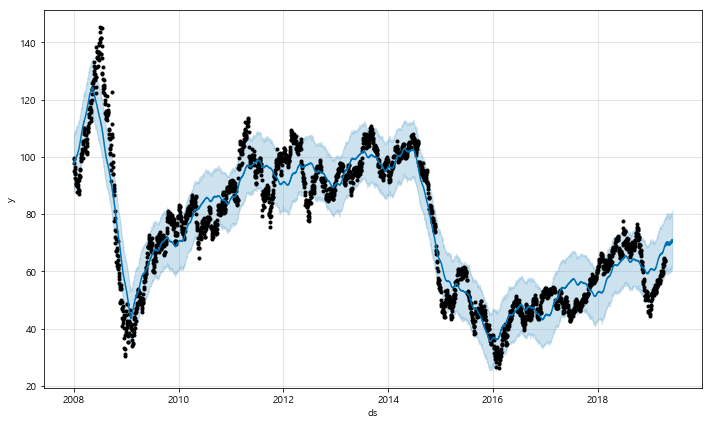

In [40]:
forecast2 = m2.predict(future2)
m2.plot(forecast2);

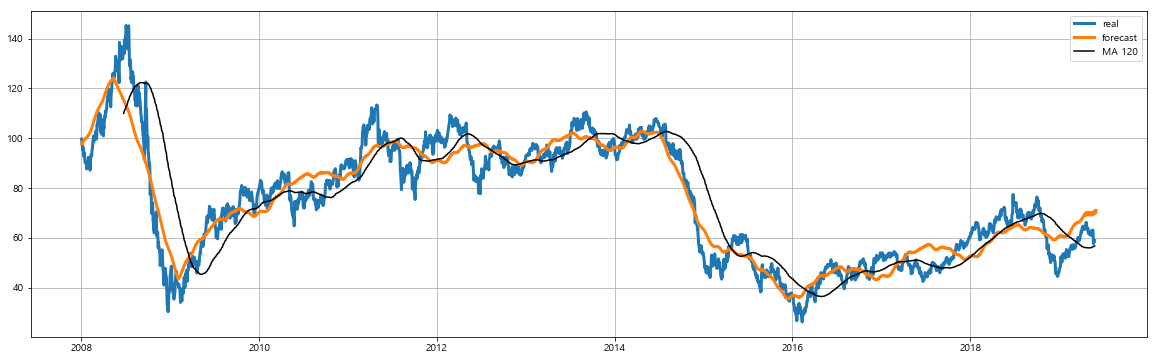

In [41]:
plt.figure(figsize=(20,6))
plt.plot(df3.index, df3['Price'], label='real',lw="3")
plt.plot(forecast2['ds'], forecast2['yhat'], label='forecast',lw="3")
plt.plot(df3["Price"].rolling(window=120).mean(), color="black",label = "MA 120",lw="1.5")

plt.grid()
plt.legend()
plt.show()

## forecast의 그래프와 real 그래프를 비교한 결과 꽤나 비슷한 추이를 보인다고 볼 수 있다
> 하지만 상품 특성상 최근 미중무역분쟁과 멕시코 관세도입 등의 <br><br>정치적 이슈에 큰 영향을 받기 때문에, prophet을 통한 시계열 분석 후<br><Br>투자 등의 결정을 내리기 전 신중한 판단을 내려야 한다는 한계점이 존재한다.